In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import process_library as preprocess
import preprocessing
import cleavage_rate as clv
reload(clv)
reload(preprocess)
reload(preprocessing)

<module 'preprocessing' from 'preprocessing.pyc'>

In [4]:
guideE = 'GACGCATAAAGATGAGACGC'
filenameE = 'WT_cleavage_rate_and_y0.txt'
PathE = '../../data_nucleaseq_Finkelsteinlab/targetE/'
dataE = pd.read_table(PathE+filenameE, usecols=['target', 'cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl'])
dataE.rename(columns={'target':'Sequence'}, inplace=True)
dataE.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl
0,TTTAGAGCGTATTTCATGAGACGCTGG,2.657239e-06,6.222793e-24,0.000004
1,TTTAGACTGCGATAAAGATGAGACGCTGG,2.767674e-22,1.326366e-25,0.000005
2,TTTAGACGCATAAAGATGAGACGCCTTAA,1.199120e-06,1.717058e-27,0.000002
3,TTTAGACGCATAAAGATGAGACGCTAGGA,5.308185e-05,4.825889e-05,0.000069
4,TTTAGACGTCAGTAAAGATGAGACGCTGG,8.747661e-25,7.856313e-27,0.000001


In [5]:
guideD = 'GTGATAAGTGGAATGCCATG'
filenameD = 'WT_cleavage_rate_and_y0.txt'
PathD = '../../data_nucleaseq_Finkelsteinlab/targetD/'
dataD = pd.read_table(PathD+filenameD, usecols=['target', 'cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl'])
dataD.rename(columns={'target':'Sequence'}, inplace=True)
dataD.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl
0,TTTAGTGATCAGTGGAATGTCATGTGG,3.252077e-04,2.290311e-04,0.000355
1,TTGTAGTGATAAGTGGAATCGCCATGTGG,5.840645e-25,6.486547e-27,0.000004
2,TTTAGTGATAAGTGGCATGCCGTGTGG,8.556538e-18,2.214419e-25,0.000002
3,ACGAACGTGATAAGTGGAATGCCATGTGG,2.161781e-01,1.283388e-01,0.235743
4,TTTATTGATAAGTGGAATGCCATCTGG,2.839218e-04,2.441840e-04,0.000420


In [6]:
Cas='Cas9'
on_targetD = 'TTTA' + guideD + 'TGG'
on_targetE = 'TTTA' + guideE + 'TGG'
seq_colname = 'Sequence'
output_colnames = ['cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 2
out_file_name = filenameE.split('.')[0]
out_path = '../data_nucleaseq_Finkelsteinlab/'

print on_targetE
print on_targetD

TTTAGACGCATAAAGATGAGACGCTGG
TTTAGTGATAAGTGGAATGCCATGTGG


In [7]:
reload(preprocess)
new_dataE = preprocess.process_Finkelstein_Library(dataE, on_targetE, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = 0, Mut_max = 2,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = False)
new_dataE['Target']=preprocess.separate_PAM(on_targetE)[1]
new_dataE.head()

process_library.py:195: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Mut_Seqs = sa[[ta != sa]]
process_library.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Mut_Seqs = sa[[ta != sa]]
process_library.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Mut_Seqs_on_t = ta[[ta != sa]]
process_library.py:180:

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions,Target
5,CGCAGAGTAGAAAAACGCAG,0.006562,0.005024,0.008606,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||||||.||||||\nCG...,CGCAGAGTAGAAATA-CGCAG\n||||||||||||| | |||||\n...,r:14:A,r,1.0,14,CGCAGAGTAGAAATACGCAG
6,CGCGGAGTAGAAATACGTAG,0.000542,0.000439,0.000817,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||.|||||||||||||.||\nCG...,CGCAG-AGTAGAAATACGC-AG\n||| | |||||||||||| ||...,r:4:G|r:18:T,r,2.0,4|18,CGCAGAGTAGAAATACGCAG
7,CGCAGAGTAGAAATACGCAG,0.182457,0.111880,0.191265,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,,CGCAGAGTAGAAATACGCAG
12,CGCAGAGTAGAAATACGCAG,0.168158,0.112466,0.186088,True,TGG,True,1,CGCAGAGTAGAAATACGCAG-\n|||||||||||||||||||| \n...,CGCAGAGTAGAAATACGCAG-\n|||||||||||||||||||| \n...,OT,OT,0.0,,CGCAGAGTAGAAATACGCAG
13,CGCAGAGTAGAAATACGCAG,0.210355,0.158494,0.312250,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,,CGCAGAGTAGAAATACGCAG


In [8]:
reload(preprocess)
new_dataD = preprocess.process_Finkelstein_Library(dataD, on_targetD, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = 0, Mut_max = 2,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = False)

new_dataD['Target']=preprocess.separate_PAM(on_targetD)[1]
new_dataD.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions,Target
0,GTACTGTAAGGTGACTAGTG,3.252077e-04,2.290311e-04,0.000355,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n||||.|||||||||.|||||\nGT...,GTACC-GTAAGGTGAA-TAGTG\n||| | |||||||| | |||||...,r:5:T|r:15:C,r,2.0,5|15,GTACCGTAAGGTGAATAGTG
2,GTGCCGTACGGTGAATAGTG,8.556538e-18,2.214419e-25,0.000002,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n||.|||||.|||||||||||\nGT...,GTA-CCGTAA-GGTGAATAGTG\n|| |||| | |||||||||||...,r:3:G|r:9:C,r,2.0,3|9,GTACCGTAAGGTGAATAGTG
3,GTACCGTAAGGTGAATAGTG,2.161781e-01,1.283388e-01,0.235743,True,TGG,True,2,GTACCGTAAGGTGAATAGTG--\n|||||||||||||||||||| ...,GTACCGTAAGGTGAATAGTG--\n|||||||||||||||||||| ...,OT,OT,0.0,,GTACCGTAAGGTGAATAGTG
4,CTACCGTAAGGTGAATAGTT,2.839218e-04,2.441840e-04,0.000420,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n.||||||||||||||||||.\nCT...,G-TACCGTAAGGTGAATAGTG-\n |||||||||||||||||| ...,r:1:C|r:20:T,r,2.0,1|20,GTACCGTAAGGTGAATAGTG
5,GGACCGAAAGGTGAATAGTG,9.950184e-25,1.203337e-26,0.000002,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n|.||||.|||||||||||||\nGG...,GT-ACCGTAA-GGTGAATAGTG\n| |||| || |||||||||||...,r:2:G|r:7:A,r,2.0,2|7,GTACCGTAAGGTGAATAGTG


In [9]:
frames = [new_dataD, new_dataE]
combined_data = pd.concat(frames)
combined_data.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions,Target
0,GTACTGTAAGGTGACTAGTG,3.252077e-04,2.290311e-04,0.000355,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n||||.|||||||||.|||||\nGT...,GTACC-GTAAGGTGAA-TAGTG\n||| | |||||||| | |||||...,r:5:T|r:15:C,r,2.0,5|15,GTACCGTAAGGTGAATAGTG
2,GTGCCGTACGGTGAATAGTG,8.556538e-18,2.214419e-25,0.000002,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n||.|||||.|||||||||||\nGT...,GTA-CCGTAA-GGTGAATAGTG\n|| |||| | |||||||||||...,r:3:G|r:9:C,r,2.0,3|9,GTACCGTAAGGTGAATAGTG
3,GTACCGTAAGGTGAATAGTG,2.161781e-01,1.283388e-01,0.235743,True,TGG,True,2,GTACCGTAAGGTGAATAGTG--\n|||||||||||||||||||| ...,GTACCGTAAGGTGAATAGTG--\n|||||||||||||||||||| ...,OT,OT,0.0,,GTACCGTAAGGTGAATAGTG
4,CTACCGTAAGGTGAATAGTT,2.839218e-04,2.441840e-04,0.000420,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n.||||||||||||||||||.\nCT...,G-TACCGTAAGGTGAATAGTG-\n |||||||||||||||||| ...,r:1:C|r:20:T,r,2.0,1|20,GTACCGTAAGGTGAATAGTG
5,GGACCGAAAGGTGAATAGTG,9.950184e-25,1.203337e-26,0.000002,False,TGG,True,0,GTACCGTAAGGTGAATAGTG\n|.||||.|||||||||||||\nGG...,GT-ACCGTAA-GGTGAATAGTG\n| |||| || |||||||||||...,r:2:G|r:7:A,r,2.0,2|7,GTACCGTAAGGTGAATAGTG


In [10]:
combined_data.to_csv('../../data_nucleaseq_Finkelsteinlab/combined_data_DE.csv', index=False)

In [11]:
reload(preprocessing)
xdata,ydata,yerr = preprocessing.prepare_multiprocessing_seq_dep('combined_data_DE.csv','../../data_nucleaseq_Finkelsteinlab/')

In [12]:
a = 0
print xdata[a]
print ydata[a]
print yerr[a]

['AAACCGTAAGGTGAATAGTG', 'GTACCGTAAGGTGAATAGTG', [1, 2]]
[-4.918308845340664]
[0.1307020343906009]


In [38]:
parameters2 = np.loadtxt('../parameters_combined.txt')
parameters = np.zeros(35)
parameters[0:20] = parameters2[1:21]
parameters[-2] = parameters2[-2]
parameters[-1] = parameters2[-1]
parameters[20:33] = 6.*np.ones(13)
parameters[21] = 0. #match AT
parameters[24] = 0. #match AU
parameters[29] = 0. #match GC
parameters[30] = 2. #wobble pair
parameters[25] = 2. #TG
parameters[27] = 3. #TU
parameters[23] = 4.5 #AC
parameters[31] = 7. #CC
parameters[28] = 7. #GG
parameters[22] = 6.5 #AG
modelID = 'Sequence_dependent_clv_v1'

chi = 0.0

for i in range(len(xdata)):
    chi = chi + clv.calc_chi_squared(parameters, xdata[i],ydata[i],yerr[i],20,'Sequence_dependent_clv_v1')
    
print chi

206905.79559862564


In [14]:
ydataFake = []
yerrFake=[]
for i in range(len(xdata)):
    ydataFake.append([np.log10(clv.calc_clv_rate_fast(parameters,'Sequence_dependent_clv_v1',xdata[i],20))])
    yerrFake.append([1.])
                      
chi = 0.0

for i in range(len(xdata)):
    chi = chi + clv.calc_chi_squared(parameters, xdata[i],ydataFake[i],yerrFake[i],20,'Sequence_dependent_clv_v1')
    
print chi

0.0


Text(0.5,1,'Single mismatches per mismatch type, guide E')

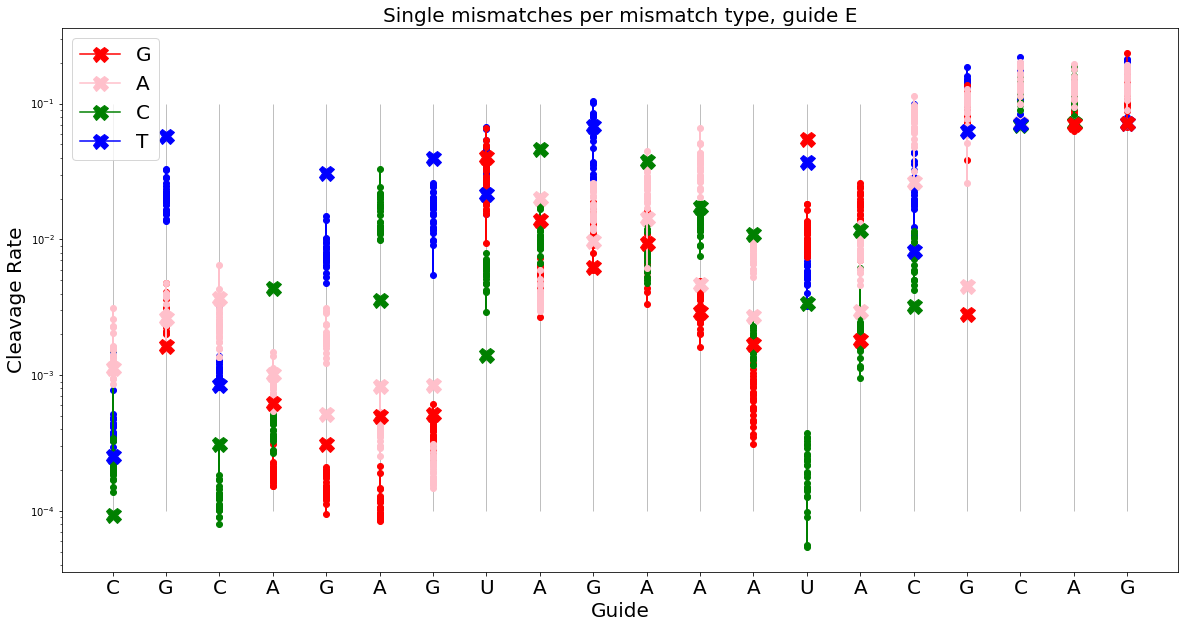

In [42]:
plt.figure(figsize=[20,10])
guideE = 'CGCAGAGTAGAAATACGCAG'

path = '../../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
data = pd.read_csv(path+filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
labelE = []
labelD = []
for i in range(20):
    labelE.append(guide_sequenceE[i])
    labelD.append(guide_sequenceD[i])

for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: preprocess.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
        #if guide_sequenceD[position-1] == 'C':
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plt.semilogy(np.ones(len(A))*position,A,color='blue',marker='o')
    plt.semilogy(np.ones(len(C))*position,C,color='red',marker='o')
    plt.semilogy(np.ones(len(G))*position,G,color='green',marker='o')
    plt.semilogy(np.ones(len(T))*position,T,color='pink',marker='o')
    
for i in range(20):
    if guideE[i]=='A':
        Ttemp = guideE[0:i] + 'T' + guideE[(i+1):20]
        Gtemp = guideE[0:i] + 'G' + guideE[(i+1):20]
        Ctemp = guideE[0:i] + 'C' + guideE[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideE],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideE],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideE],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
        
    elif guideE[i]=='T':
        Atemp = guideE[0:i] + 'A' + guideE[(i+1):20]
        Gtemp = guideE[0:i] + 'G' + guideE[(i+1):20]
        Ctemp = guideE[0:i] + 'C' + guideE[(i+1):20]

        
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideE],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideE],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideE],20)
        
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
    elif guideE[i]=='G':
        Ttemp = guideE[0:i] + 'T' + guideE[(i+1):20]
        Atemp = guideE[0:i] + 'A' + guideE[(i+1):20]
        Ctemp = guideE[0:i] + 'C' + guideE[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideE],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideE],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideE],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plotG = plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red',label='G')
    elif guideE[i]=='C':
        Ttemp = guideE[0:i] + 'T' + guideE[(i+1):20]
        Gtemp = guideE[0:i] + 'G' + guideE[(i+1):20]
        Atemp = guideE[0:i] + 'A' + guideE[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideE],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideE],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideE],20)
        
        plotA = plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink',label='A')
        plotC = plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green',label='C')
        plotT = plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue',label='T')
        
plt.vlines(range(1,21),10**-4,10**-1,color='grey',linewidth=.5);
plt.xticks(range(1,21),labelE,fontsize=20);
plt.legend(handles=[plotG[0],plotA[0],plotC[0],plotT[0]],fontsize=20)
plt.xlabel('Guide',fontsize=20)
plt.ylabel('Cleavage Rate',fontsize=20)
plt.title('Single mismatches per mismatch type, guide E',fontsize=20)

Text(0.5,1,'Single mismatches per mismatch type, guide D')

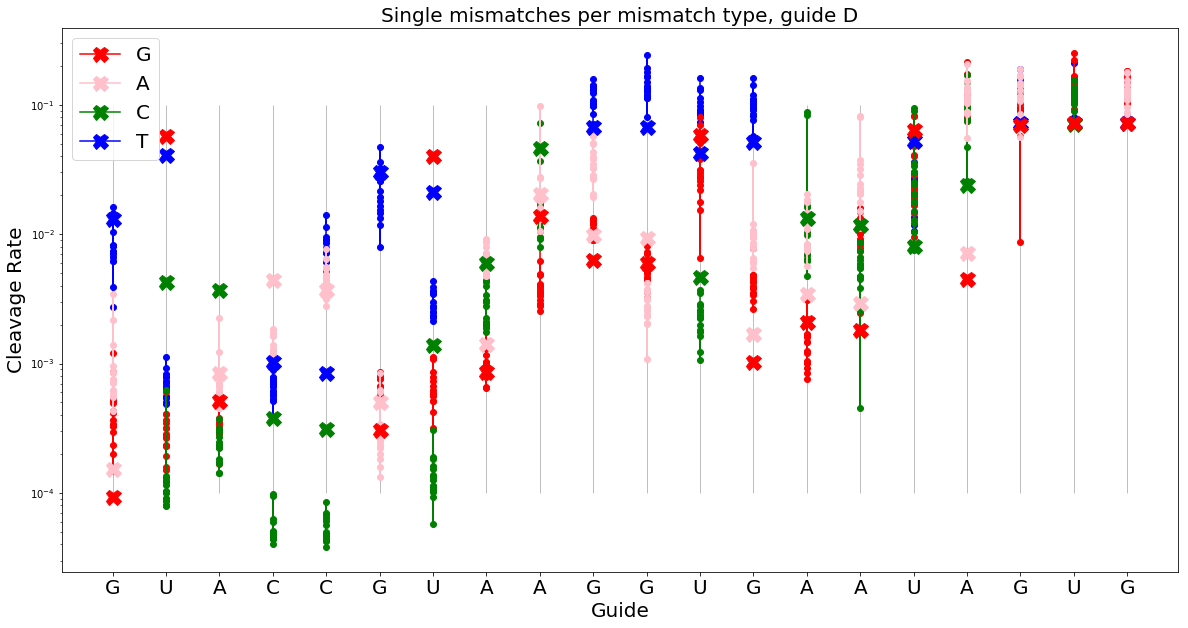

In [45]:
plt.figure(figsize=[20,10])
guideD = 'GTACCGTAAGGTGAATAGTG'

path = '../../data_nucleaseq_Finkelsteinlab/targetD/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
data = pd.read_csv(path+filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
labelE = []
labelD = []
for i in range(20):
    labelE.append(guide_sequenceE[i])
    labelD.append(guide_sequenceD[i])

for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: preprocess.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
        #if guide_sequenceD[position-1] == 'C':
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plt.semilogy(np.ones(len(A))*position,A,color='blue',marker='o')
    plt.semilogy(np.ones(len(C))*position,C,color='red',marker='o')
    plt.semilogy(np.ones(len(G))*position,G,color='green',marker='o')
    plt.semilogy(np.ones(len(T))*position,T,color='pink',marker='o')
    
for i in range(20):
    if guideD[i]=='A':
        Ttemp = guideD[0:i] + 'T' + guideD[(i+1):20]
        Gtemp = guideD[0:i] + 'G' + guideD[(i+1):20]
        Ctemp = guideD[0:i] + 'C' + guideD[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideD],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideD],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideD],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
        
    elif guideD[i]=='T':
        Atemp = guideD[0:i] + 'A' + guideD[(i+1):20]
        Gtemp = guideD[0:i] + 'G' + guideD[(i+1):20]
        Ctemp = guideD[0:i] + 'C' + guideD[(i+1):20]

        
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideD],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideD],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideD],20)
        
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green')
        plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red')
    elif guideD[i]=='G':
        Ttemp = guideD[0:i] + 'T' + guideD[(i+1):20]
        Atemp = guideD[0:i] + 'A' + guideD[(i+1):20]
        Ctemp = guideD[0:i] + 'C' + guideD[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideD],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideD],20)
        clvC = clv.calc_clv_rate_fast(parameters,modelID,[Ctemp,guideD],20)
        
        plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink')
        plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue')
        plotG = plt.semilogy(i+1,clvC,marker='X',markersize=15.,color='red',label='G')
    elif guideD[i]=='C':
        Ttemp = guideD[0:i] + 'T' + guideD[(i+1):20]
        Gtemp = guideD[0:i] + 'G' + guideD[(i+1):20]
        Atemp = guideD[0:i] + 'A' + guideD[(i+1):20]

        
        clvT = clv.calc_clv_rate_fast(parameters,modelID,[Ttemp,guideD],20)
        clvG = clv.calc_clv_rate_fast(parameters,modelID,[Gtemp,guideD],20)
        clvA = clv.calc_clv_rate_fast(parameters,modelID,[Atemp,guideD],20)
        
        plotA = plt.semilogy(i+1,clvT,marker='X',markersize=15.,color='pink',label='A')
        plotC = plt.semilogy(i+1,clvG,marker='X',markersize=15.,color='green',label='C')
        plotT = plt.semilogy(i+1,clvA,marker='X',markersize=15.,color='blue',label='T')
        
plt.vlines(range(1,21),10**-4,10**-1,color='grey',linewidth=.5);
plt.xticks(range(1,21),labelD,fontsize=20);
plt.legend(handles=[plotG[0],plotA[0],plotC[0],plotT[0]],fontsize=20)
plt.xlabel('Guide',fontsize=20)
plt.ylabel('Cleavage Rate',fontsize=20)
plt.title('Single mismatches per mismatch type, guide D',fontsize=20)